In [28]:
import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,classification_report
from xgboost import XGBClassifier
from sklearn.preprocessing import PowerTransformer


In [2]:
data_train=pd.read_csv('thermoracleTrain.csv')
data_test=pd.read_csv('thermoracleTest.csv')



In [3]:
data_train.head()

,Atmospheric Density,Surface Temperature,Gravity,Water Content,Mineral Abundance,Orbital Period,Proximity to Star,Magnetic Field Strength,Radiation Levels,Atmospheric Composition Index,Prediction
0,0.472806,NaN,-0.313872,-2.089299,-0.152201,-0.885649,0.900105,NaN,Category_6,0.692907,5.0
1,4.180154,-1.157515,2.430956,-1.595850,-3.188678,-0.609434,-0.199828,Category_9,Category_9,NaN,0.0
2,-0.129008,1.621592,-0.785741,2.081196,-1.413796,-0.095152,-3.502577,NaN,Category_8,-0.677182,4.0
3,-3.122000,-2.299818,1.072092,0.353524,-0.192529,2.917067,-1.972329,NaN,Category_11,0.109429,1.0
4,-1.459426,2.890268,0.148757,-0.804439,0.494875,0.044910,-0.438796,Category_6,Category_10,0.407941,9.0


In [4]:
data_grp_pred=data_train.groupby(by='Prediction')

In [5]:
n=[0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0]
numeric_cols = data_train.select_dtypes(include=['number']).columns

In [6]:
data_miss=pd.DataFrame({i: {j: data_grp_pred.get_group(i)[j].isnull().sum() for j in data_train.columns} for i in n})

In [7]:
data_miss

,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0
Atmospheric Density,291,320,277,285,283,262,283,300,258,283
Surface Temperature,295,303,278,282,271,273,301,311,280,302
Gravity,287,308,281,287,274,253,303,304,282,247
Water Content,313,345,272,330,293,237,269,308,282,287
Mineral Abundance,288,313,258,256,269,240,302,277,284,297
Orbital Period,295,328,301,289,273,254,270,329,250,266
Proximity to Star,273,315,264,273,274,240,287,322,263,275
Magnetic Field Strength,334,311,299,294,277,252,287,307,290,290
Radiation Levels,272,318,285,301,304,260,241,319,288,271
Atmospheric Composition Index,252,301,262,282,291,280,274,304,270,279


In [8]:

data_mean = pd.DataFrame({i: {j: data_grp_pred.get_group(i)[j].mean() for j in numeric_cols} for i in n})


In [9]:
data_mean

,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0
Atmospheric Density,3.921532,-3.297832,0.379348,0.297654,-0.242723,0.416545,0.674309,-1.006587,-0.009562,-0.600104
Surface Temperature,-0.682305,-1.665089,-1.211284,-1.802084,2.255029,-0.538764,0.009103,2.291687,-0.735336,2.228779
Gravity,0.553521,0.305522,0.796504,-1.708823,0.056026,-0.412372,1.083548,-0.291066,0.055344,-0.424353
Water Content,-0.460887,0.353767,1.660137,-1.072151,0.817280,-1.061340,2.136469,-0.855551,-1.062451,-0.506628
Mineral Abundance,-2.086673,-0.973167,1.041288,0.477460,0.503044,-0.559296,0.738210,-0.943071,1.412511,0.521572
Orbital Period,0.100659,0.152443,1.117395,-0.197597,0.030967,-0.853721,-1.879996,0.831037,0.598716,-0.041280
Proximity to Star,0.131137,0.225078,0.458239,-0.149356,-1.329870,-0.718759,0.477878,1.175539,-0.235247,-0.198127
Atmospheric Composition Index,0.316686,0.278649,0.529750,-0.428568,-0.416531,-0.136459,-0.340039,-0.159506,0.203706,0.122907
Prediction,0.000000,1.000000,2.000000,3.000000,4.000000,5.000000,6.000000,7.000000,8.000000,9.000000


In [10]:
for i in numeric_cols:
    print(i," :- ",data_train[i].skew())

Atmospheric Density  :-  0.5835477539405073
Surface Temperature  :-  0.2942262314324271
Gravity  :-  -0.03091735733511401
Water Content  :-  0.18396138130836
Mineral Abundance  :-  -0.09027762623823318
Orbital Period  :-  -0.09178650182965953
Proximity to Star  :-  0.2089930858889686
Atmospheric Composition Index  :-  -0.22250346799816811
Prediction  :-  0.025229295072632996


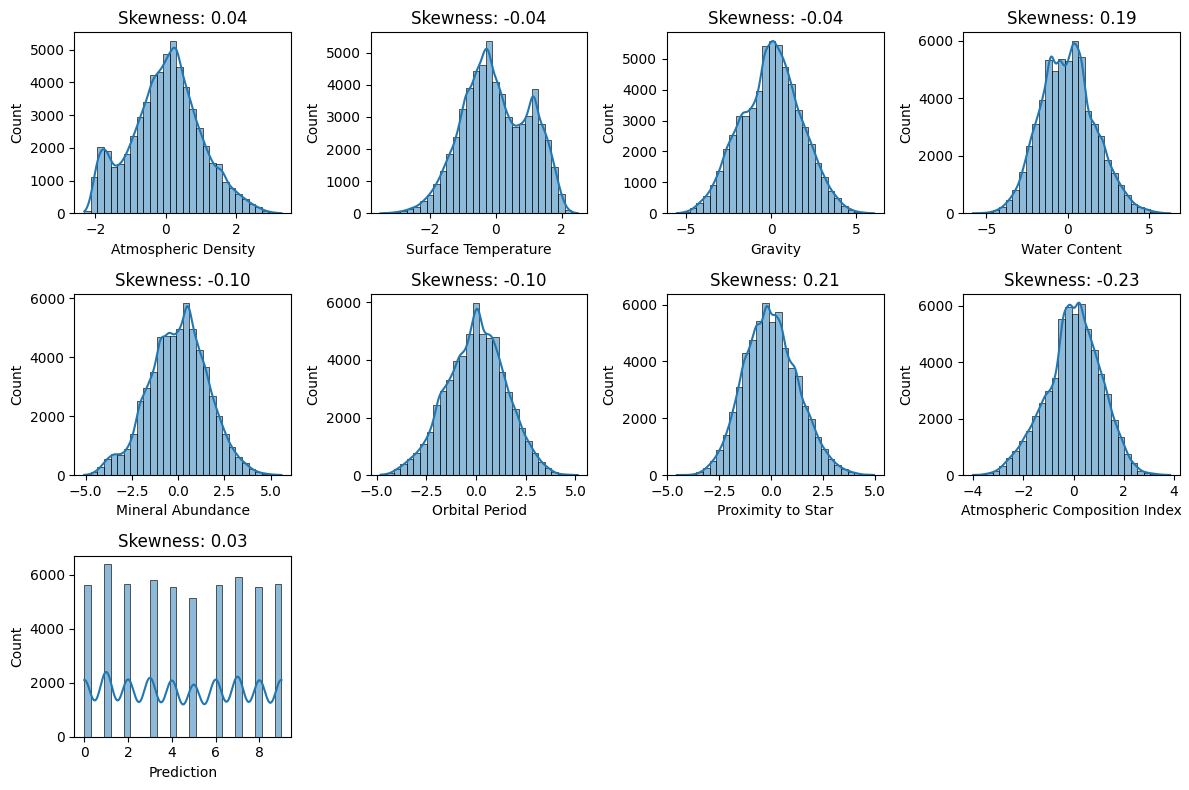

In [32]:
plt.figure(figsize=(12, 8))
for i, col in enumerate(numeric_cols, 1):
    plt.subplot(3, 4, i)  
    sns.histplot(data_train[col], bins=30, kde=True)
    plt.title(f'Skewness: {data_train[col].skew():.2f}')
plt.tight_layout()
plt.show()

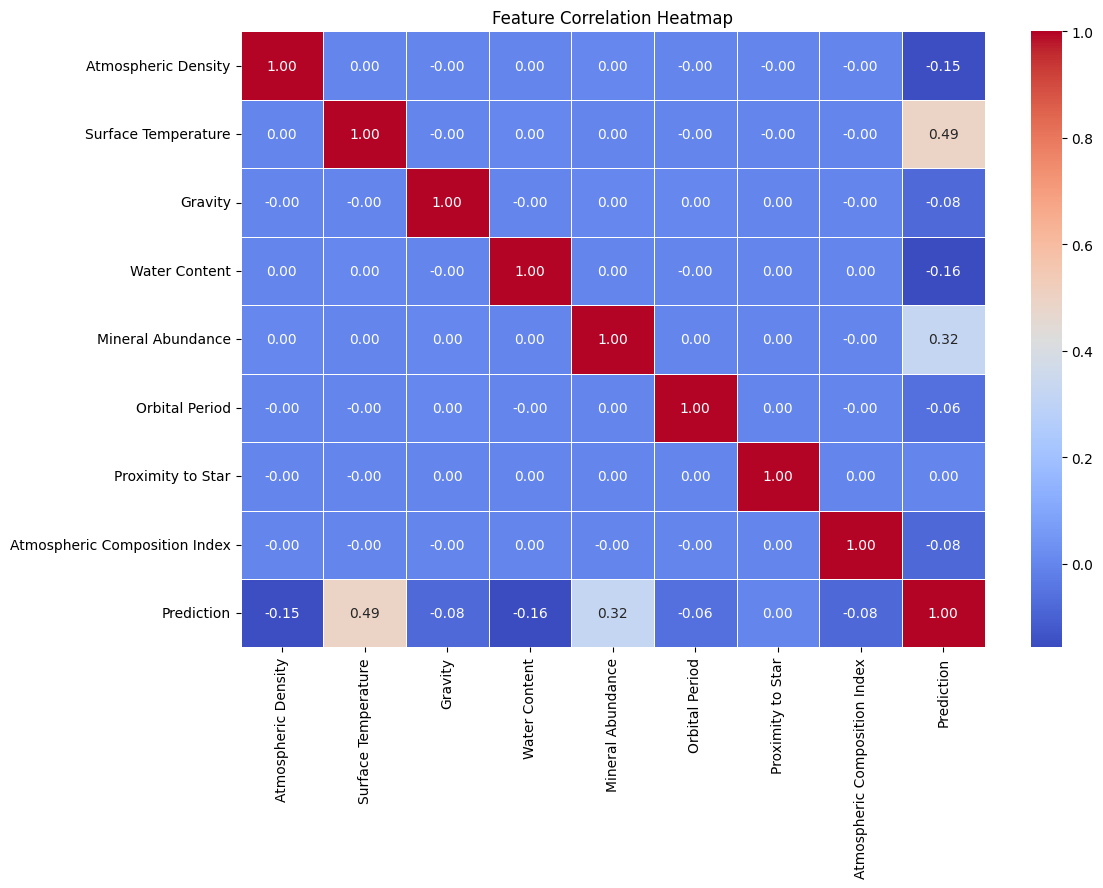

In [12]:
correlation_matrix = data_train.drop(['Magnetic Field Strength','Radiation Levels'],axis=1).corr()


plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)
plt.title("Feature Correlation Heatmap")
plt.show()


In [17]:
categorical_cols = ['Magnetic Field Strength', 'Radiation Levels']

In [22]:
data_mode = data_train.groupby('Prediction')[categorical_cols].agg(lambda x: x.mode()[0]).to_dict('index')

data_mode['Overall'] = data_train[categorical_cols].agg(lambda x: x.mode()[0]).to_dict()


In [23]:
def hand_miss(col,pred):
    if pred in data_mean and col in data_mean[pred]:  
        return data_mean[pred][col]  
    
def hand_miss_cat(col, pred):
    if pred in data_mode and col in data_mode[pred]:  
        return data_mode[pred][col]
    else:
        return data_mode['Overall'][col] 

In [24]:
for i in numeric_cols:
    data_train[i] = data_train.apply(lambda row: hand_miss(i, row['Prediction']) if pd.isna(row[i]) else row[i],axis=1)

In [25]:
for col in categorical_cols:
    data_train[col] = data_train.apply(lambda row: hand_miss_cat(col, row['Prediction']) if pd.isna(row[col]) else row[col], axis=1)

In [26]:
data_miss_Current=pd.DataFrame({i: {j: data_grp_pred.get_group(i)[j].isnull().sum() for j in data_train.columns} for i in n})

In [27]:
data_miss_Current

,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0
Atmospheric Density,0,0,0,0,0,0,0,0,0,0
Surface Temperature,0,0,0,0,0,0,0,0,0,0
Gravity,0,0,0,0,0,0,0,0,0,0
Water Content,0,0,0,0,0,0,0,0,0,0
Mineral Abundance,0,0,0,0,0,0,0,0,0,0
Orbital Period,0,0,0,0,0,0,0,0,0,0
Proximity to Star,0,0,0,0,0,0,0,0,0,0
Magnetic Field Strength,0,0,0,0,0,0,0,0,0,0
Radiation Levels,0,0,0,0,0,0,0,0,0,0
Atmospheric Composition Index,0,0,0,0,0,0,0,0,0,0


In [41]:
data_train.isnull().sum()

Atmospheric Density               142
Surface Temperature               136
Gravity                           158
Water Content                     141
Mineral Abundance                 137
Orbital Period                    142
Proximity to Star                 159
Magnetic Field Strength             0
Radiation Levels                    0
Atmospheric Composition Index     147
Prediction                       3039
dtype: int64

In [42]:
numeric_cols = ['Atmospheric Density', 'Surface Temperature', 'Gravity', 'Water Content', 
                'Mineral Abundance', 'Orbital Period', 'Proximity to Star', 'Atmospheric Composition Index','Prediction']
data_train = data_train.dropna(subset=numeric_cols, how='any')

In [43]:

pt = PowerTransformer(method='yeo-johnson')
data_train[['Surface Temperature','Atmospheric Density']] = pt.fit_transform(
    data_train[['Surface Temperature','Atmospheric Density']]
)

C:\Users\ks520\AppData\Local\Temp\ipykernel_6540\2640152891.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_train[['Surface Temperature','Atmospheric Density']] = pt.fit_transform(


In [82]:
data_magnetic = {
    'Category_0': 0,
    'Category_1': 1,
    'Category_2': 2,
    'Category_3': 3,
    'Category_4': 4,
    'Category_5': 5,
    'Category_6': 6,
    'Category_7': 7,
    'Category_8': 8,
    'Category_9': 9,
    'Category_10': 10,
    'Category_11': 11,
    'Category_12': 12,
    'Category_13': 13,
    'Category_14': 14,
    'Category_15': 15,
    'Category_16': 16,
    'Category_17': 17,
    'Category_18': 18,
    'Category_19': 19,
    'Category_20': 20
}

In [ ]:
data_train['Radiation Levels'] = data_train['Radiation Levels'].replace(data_magnetic)
data_train['Magnetic Field Strength'] = data_train['Magnetic 1Field Strength'].replace(data_magnetic)

C:\Users\ks520\AppData\Local\Temp\ipykernel_6540\125104978.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_train['Radiation Levels'] = data_train['Radiation Levels'].replace(data_magnetic)
C:\Users\ks520\AppData\Local\Temp\ipykernel_6540\125104978.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_train['Magnetic Field Strength'] = data_train['Magnetic Field Strength'].replace(data_magnetic)


In [47]:

xgb = XGBClassifier(colsample_bytree=1.0,learning_rate=0.2,max_depth=7,n_estimators=200,subsample=0.8,use_label_encoder=False, eval_metric='mlogloss', random_state=42)

In [48]:
X_train,X_test,y_train,y_test=train_test_split(data_train.drop('Prediction',axis=1),data_train['Prediction'],random_state=42,test_size=0.3)


In [49]:
xgb.fit(X_train,y_train)

c:\Users\ks520\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\core.py:158: UserWarning: [18:42:41] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-06abd128ca6c1688d-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=1.0, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='mlogloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.2, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=7,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=200,
              n_jobs=None, num_parallel_tree=None, objective='multi:softprob', ...)

In [50]:
pred=xgb.predict(X_test)

In [51]:
print(accuracy_score(y_test,pred))

0.9275557376089882


In [52]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

         0.0       0.96      0.96      0.96      1716
         1.0       0.98      0.98      0.98      1940
         2.0       0.94      0.93      0.94      1720
         3.0       0.92      0.90      0.91      1760
         4.0       0.91      0.91      0.91      1609
         5.0       0.90      0.91      0.91      1554
         6.0       0.96      0.96      0.96      1656
         7.0       0.94      0.94      0.94      1799
         8.0       0.89      0.90      0.90      1638
         9.0       0.87      0.88      0.88      1697

    accuracy                           0.93     17089
   macro avg       0.93      0.93      0.93     17089
weighted avg       0.93      0.93      0.93     17089



In [55]:
data_test.head()

,Atmospheric Density,Surface Temperature,Gravity,Water Content,Mineral Abundance,Orbital Period,Proximity to Star,Magnetic Field Strength,Radiation Levels,Atmospheric Composition Index
0,-1.303074,2.932540,-0.168043,-1.220249,-1.942662,0.950473,1.540782,13,6,-0.729809
1,0.081124,-3.747390,-0.598897,1.563487,-0.199953,-1.844926,1.095349,11,10,-0.341850
2,-3.709952,-1.689588,0.259499,1.020046,-2.094565,0.344641,-0.094227,9,9,-0.532658
3,4.838804,0.442909,0.995312,-0.385272,-0.818065,-1.903998,2.727794,10,9,-0.205558
4,0.742217,2.802281,-1.144759,2.475840,-0.585959,0.880694,-1.942863,11,6,0.763087


In [83]:
data_test['Radiation Levels'] = data_test['Radiation Levels'].replace(data_magnetic)
data_test['Magnetic Field Strength'] = data_test['Magnetic Field Strength'].replace(data_magnetic)

C:\Users\ks520\AppData\Local\Temp\ipykernel_6540\908365937.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data_test['Magnetic Field Strength'] = data_test['Magnetic Field Strength'].replace(data_magnetic)


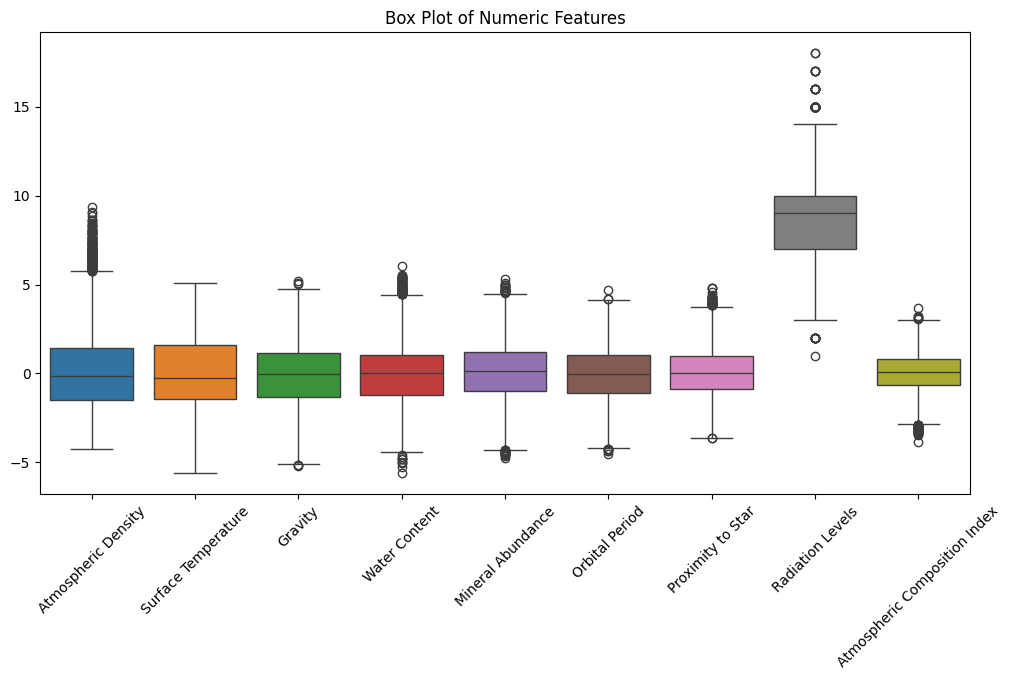

In [56]:
numeric_cols_data_test = data_test.select_dtypes(include=['number'])
plt.figure(figsize=(12, 6))
sns.boxplot(data=numeric_cols_data_test)
plt.xticks(rotation=45)  # Rotate labels for better readability
plt.title("Box Plot of Numeric Features")
plt.show()


In [72]:
numeric_cols_test=numeric_cols[:8]
numeric_cols_test.append('Radiation Levels')

In [73]:

for i in numeric_cols_test:

   Q1 = data_test[i].quantile(0.25)  
   Q3 = data_test[i].quantile(0.75)  
   IQR = Q3 - Q1  

   lower_bound = Q1 - 1.5 * IQR  
   upper_bound = Q3 + 1.5 * IQR  


  
   data_test[i] = data_test[i].clip(lower=lower_bound, upper=upper_bound)
   outliers = ((data_test[i] < lower_bound) | (data_test[i] > upper_bound))


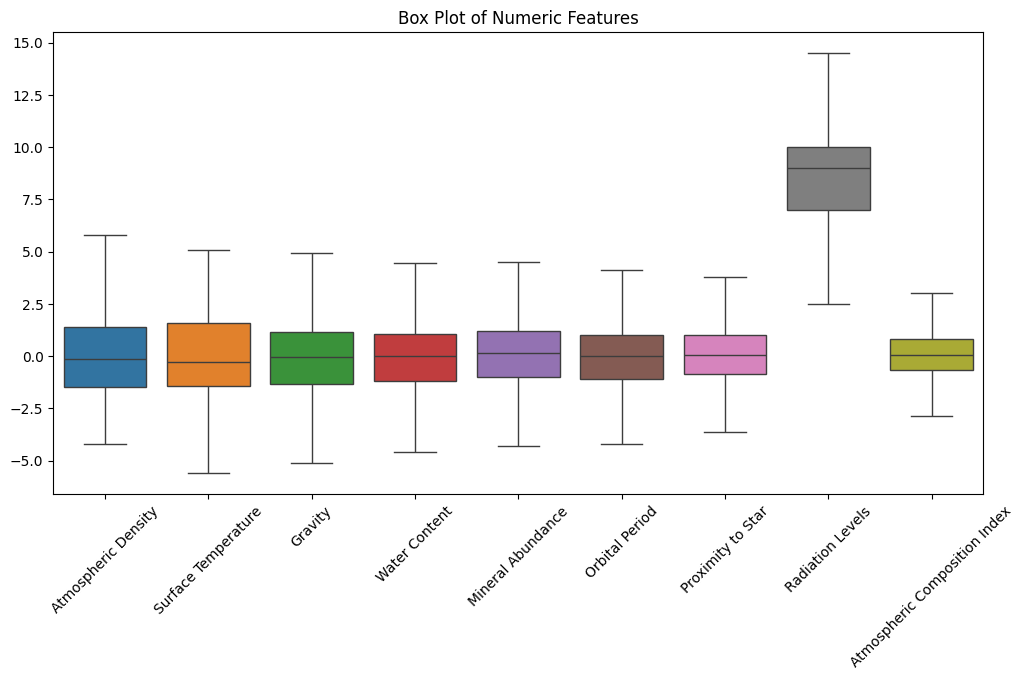

In [74]:
numeric_cols_data_test = data_test.select_dtypes(include=['number'])
plt.figure(figsize=(12, 6))
sns.boxplot(data=numeric_cols_data_test)
plt.xticks(rotation=45)  # Rotate labels for better readability
plt.title("Box Plot of Numeric Features")
plt.show()


In [84]:
data_test['Prediction'] = xgb.predict(data_test.to_numpy())  # Convert DataFrame to NumPy array

In [85]:
ans=pd.DataFrame({'Planet_ID':data_test.index,'Prediction':data_test['Prediction']})

In [88]:

prediction_map = {
    0: "Bewohnbar",
    1: "Terraformierbar",
    2: "Rohstoffreich",
    3: "Wissenschaftlich",
    4: "Gasriese",
    5: "Wüstenplanet",
    6: "Eiswelt",
    7: "Toxische Atmosphäre",
    8: "Hohe Strahlung",
    9: "Toter Himmelskörper"
}


ans['Prediction'] = ans['Prediction'].map(prediction_map)

In [89]:
ans['Prediction'].value_counts()

Prediction
Terraformierbar        1304
Toter Himmelskörper    1099
Bewohnbar              1075
Gasriese               1063
Toxische Atmosphäre    1040
Wissenschaftlich       1012
Rohstoffreich           980
Eiswelt                 892
Wüstenplanet            813
Hohe Strahlung          722
Name: count, dtype: int64

In [94]:
ans.to_csv('Submission_2.csv')